# Optimization Process

### Load cases, run once at each load case

It is suggested to run once with a specific load case you want to design and then just re run multiple times the cell below this one (the one where you change the thicknesses)

In [4]:
from variables import *
from wp4_1 import Aerodynamics, InternalForces
from wp4_2 import WingBox


xflr_files = 'XFLRdata\\XFLR5sims'

# change these
aircraft_mass = 35688
alt_sound_speed = 296.56

internal_forces = InternalForces(aircraft_mass=aircraft_mass, load_factor= load_factor, sound_speed=alt_sound_speed, half_chord_sweep= hchord_sweep, fus_radius=fus_radius, density=rho0, airspeed= airspeed, 
                                 c_r= c_r, wingspan= b, engine_z_loc= engine_z_loc, engine_length= engine_length, x_hl= x_hl, x_lemac= x_lemac, MAC= MAC, 
                                 one_engine_thrust= one_engine_thrust, fan_cowl_diameter= fan_cowl_diameter, c_t= c_r*tr)
    
    
g_shear, g_moment, g_torque, g_axial = internal_forces.force_diagrams(engine_mass=engine_mass, wing_box_length=wing_box_length, 
                                        fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)[4:]


Now defining the wingbox, you can finally change the thicknesses here!

Wing span modified goes from 0 to 12.08
Max Tip Displacement OK Displacement = 3.01526775010549 11.209173792213717 (% Wingspan)
Wing Tip Max. Rotation Exceeded Max displacement = 31.190054611471705


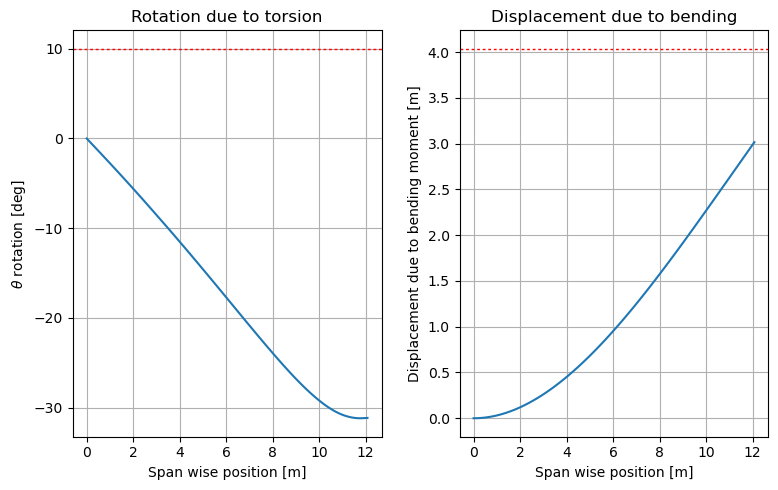

FileNotFoundError: [Errno 2] No such file or directory: 'WP4-5/deflections.csv'

In [5]:
wingbox = WingBox(c_r= c_r, c_t = None, wingspan=b, area_factor_flanges=12, intersection= intersection, tr= tr, t_spar= 0.003, t_caps= 0.002)

stringers = [20, 1, 'L', {'base': 30e-3, 'height': 30e-3, 'thickness base': 2e-3, 'thickness height': 2e-3}]
# if I stringer chosen use this
# [20, 1, 'L', {'base': 30e-3, 'height': 30e-3, 'thickness base': 2e-3, 'thickness height': 2e-3}]
wingbox.show(wingbox.z, loads= [g_moment, g_torque], moduli= [E, G], stringers= stringers, limits=[0, 10], plot= True, degrees= True)
